# Ordinary Least Squares

The simple linear regression model can be written as follows

$$
y_t = \beta_0 + \beta_1 x_{t,1} + \beta_2 x_{t,2} + ... + \beta_p x_{t,k} + u_t
$$
or in vector form:
$$
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{u}
$$

where $\mathbf{y}$ and $\mathbf{u}$ are $T \times 1$ vectors containing the dependent variables and the errors of the $T$ observations, and $\mathbf{X}$ is an $T \times K$ matrix of independent variables.

$$
{\displaystyle \mathbf {X} ={\begin{bmatrix}X_{11}&X_{12}&\cdots &X_{1K}\\X_{21}&X_{22}&\cdots &X_{2K}\\\vdots &\vdots &\ddots &\vdots \\X_{T1}&X_{T2}&\cdots &X_{TK}\end{bmatrix}},\qquad {\boldsymbol {\beta }}={\begin{bmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{K}\end{bmatrix}},\qquad \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{T}\end{bmatrix}}.}
$$


OLS estimate is that which minimizes the residual sum of squares (RSS):
$$
RSS = \sum_{t=1}^T (y_t - x_t'\beta)^2
$$

Hence, assuming that $(X'X)$ is non-singular (i.e. invertible), the OLS estimate is given by
$$
b = (X'X)^{-1}X'y
$$

From here, we can obtain the OLS sample residuals
$$
\hat{u} = y - Xb = y - X((X'X)^{-1}X'y) = (I - X(X'X)^{-1}X')y = M_x y
$$

Therefore, the population residuals ($u$) relate to the sample residuals ($\hat{u}$) in the following way
$$
\begin{align*}
\hat{u} &= M_x(X\beta + u) \\
        &= (I - X(X'X)^{-1}X')X\beta + M_x u \\
        &= X\beta - X(X'X)^{-1}X'X\beta + M_x u \\
        &= X\beta - X\beta + M_x u = M_x u
\end{align*}
$$

And similarly, the relation between the true population parameters ($\beta$) and OLS estimates ($b$) can be found to be
$$
b = X(X'X)^{-1}X'(X\beta + u) = \beta + (X'X)^{-1}X'u
$$
Usually, it is assumed that in the population, $u$ is uncorrelated with $X$. Therefore, we see that $u$ has zero expected value and that the covariance between $X$ and $u$ is zero:

$$
E(u) = 0
$$

and

$$
cov(X,u) = E(X'u) = 0
$$
This, allows us to obtain an unbiased estimator of $\beta$. To see this, obtain the expected value of $b$ as
$$
\begin{align*}
E[b] &= \beta + E[(X'X)^{-1}X'u] \\
     &= \beta + E[(X'X)^{-1}]\underbrace{E[X'u]}_{=0} \\
     &= \beta
\end{align*}
$$

and the variance-covariance matrix is given by
$$
\begin{align*}
E[(b - \beta)(b - \beta)'] &= E[(X'X)^{-1}X'uu'X(X'X)^{-1}] \\
                           &= (X'X)^{-1}X'\underbrace{E[uu']}_{=\sigma^2}X(X'X)^{-1} \\
                           &= \sigma^2 (X'X)^{-1}X'X(X'X)^{-1} \\
                           &= \sigma^2 (X'X)^{-1}
\end{align*}
$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load data and rearrange for OLS estimation
data = pd.read_csv('data/ramey_data_clean.csv')

display(data)

# Create Matrix of independent variables X
X = data[["FFR"]] - data[["FFR"]].shift(1) # FFR change
X = X.to_numpy()
X = X[1:, :]
X = np.column_stack((np.ones(len(X)), X)) # Add another column with ones to have an intercept

# Create Vector y of dependent variable
y = data[['LIP']] - data[['LIP']].shift(1) # LIP change
y = y.to_numpy()
y = y[1:, :] # Take first observation out so that the size matches that of X
# display(X)
# display(y)

,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK
0,1969-01-01,3.676827,3.4,3.575151,6.30,4.633563,2.718265,3.699028,3.312912,0.000000,0.000000e+00
1,1969-02-01,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000e+00
2,1969-03-01,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-2.316979e-01
3,1969-04-01,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,2.251752e-01
4,1969-05-01,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,4.358023e-01
...,...,...,...,...,...,...,...,...,...,...,...
463,2007-08-01,4.651303,4.6,5.335936,5.02,6.006279,4.722900,4.632279,4.611401,0.024510,9.763755e-01
464,2007-09-01,4.654851,4.7,5.340164,4.94,6.018496,4.734812,4.633272,4.608724,-0.595159,3.812167e-01
465,2007-10-01,4.649541,4.7,5.343243,4.76,6.026132,4.732631,4.630331,4.608295,-0.322000,5.921640e-02
466,2007-11-01,4.655465,4.7,5.351071,4.49,6.022939,4.728299,4.634845,4.611480,0.000000,5.921640e-02


In [3]:
import scipy.stats as stats

def OLS(X,y):
    
    T = X.shape[0]
    K = X.shape[1]
    
    # Obtain the coefficients using the OLS formula (X^T*X)^(-1)*X^T*y
    A1 = np.matmul(X.T,X)
    A = np.linalg.inv(A1)
    B = np.matmul(X.T,y)
    coefficients = np.matmul(A,B)
    
    # Compute fitted values and residuals
    y_hat = np.matmul(X,coefficients)
    residuals = y - y_hat
    
    # Compute the variance of the residuals
    residuals_squared = np.matmul(residuals.T,residuals)
    sigma_hat_squared = residuals_squared / (T - K)

    # Compute the standard errors
    standard_errors = np.sqrt(sigma_hat_squared * np.diag(A))
    standard_errors = standard_errors.T # Just transposing to have same dimensions as coefficients
    
    # Compute the t-statistics
    t_stats = coefficients / standard_errors

    # Compute the p-values
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=T-K))
    
    return coefficients, standard_errors, t_stats, p_values

beta, std_error, t, p_val = OLS(X,y)
    
print("Estimated intercept coefficient:", beta[0][0])
print("Estimated FFR_change coefficient:", beta[1][0])
print("Estimated intercept std. error:", std_error[0][0])
print("Estimated FFR_change std. error:", std_error[1][0])
print("Estimated intercept t:", t[0][0])
print("Estimated FFR_change t:", t[1][0])
print("Estimated intercept p-value:", p_val[0][0])
print("Estimated FFR_change p-value:", p_val[1][0])


Estimated intercept coefficient: 0.0021111032786758
Estimated FFR_change coefficient: 0.0036377382964024917
Estimated intercept std. error: 0.0003147355430770073
Estimated FFR_change std. error: 0.0005086784120081198
Estimated intercept t: 6.707546462775162
Estimated FFR_change t: 7.151351837483569
Estimated intercept p-value: 5.7617910442786524e-11
Estimated FFR_change p-value: 3.3566482926516983e-12


Once we have determined the OLS intercept and slope estimates, we form the **OLS regression line**:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x
$$

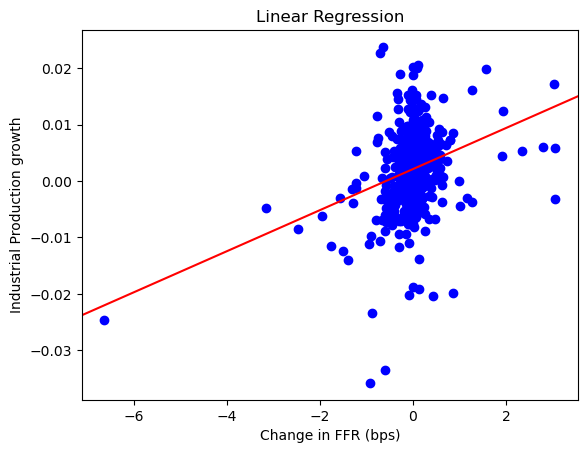

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X[:,1], y, 'bo')  # Plot the data points
plt.axline(xy1=(0, beta[0][0]), slope=beta[1][0], color='r') # Plot the regression line
plt.xlabel('Change in FFR (bps)')
plt.ylabel('Industrial Production growth')
plt.title('Linear Regression')
plt.show()

In [5]:
# Alternative: Use an external library

import statsmodels.api as sm

data2 = data
data2[['lag_FFR', 'lag_LIP']] = data[['FFR', 'LIP']].shift(1)
data
data2 = data2.dropna()
# data2 = data2.iloc[1:, :]
display(data2)

data2['FFR_change'] = data2['FFR'] - data2['lag_FFR']
# data2['FFR_change'] = data2['FFR'].sub(data2['lag_FFR'], axis = 0) 

data2['LIP_change'] = data2['LIP'] - data2['lag_LIP']
display(data2)

'''
Notice now, we do not use a numpy array for our variables, but everything is contained in a pandas dataframe.
'''

,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK,lag_FFR,lag_LIP
1,1969-02-01,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000e+00,6.30,3.676827
2,1969-03-01,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-2.316979e-01,6.61,3.683206
3,1969-04-01,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,2.251752e-01,6.79,3.691017
4,1969-05-01,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,4.358023e-01,7.41,3.687328
5,1969-06-01,3.693265,3.5,3.600048,8.90,4.712409,2.708583,3.700759,3.332562,0.001002,4.368042e-01,8.67,3.683543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2007-08-01,4.651303,4.6,5.335936,5.02,6.006279,4.722900,4.632279,4.611401,0.024510,9.763755e-01,5.26,4.649610
464,2007-09-01,4.654851,4.7,5.340164,4.94,6.018496,4.734812,4.633272,4.608724,-0.595159,3.812167e-01,5.02,4.651303
465,2007-10-01,4.649541,4.7,5.343243,4.76,6.026132,4.732631,4.630331,4.608295,-0.322000,5.921640e-02,4.94,4.654851
466,2007-11-01,4.655465,4.7,5.351071,4.49,6.022939,4.728299,4.634845,4.611480,0.000000,5.921640e-02,4.76,4.649541


/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_67826/1414427842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['FFR_change'] = data2['FFR'] - data2['lag_FFR']
/var/folders/yp/830clknj34z106g8m0dfpq9r0000gn/T/ipykernel_67826/1414427842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['LIP_change'] = data2['LIP'] - data2['lag_LIP']


,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRSHOCK,CUMRRSHOCK,lag_FFR,lag_LIP,FFR_change,LIP_change
1,1969-02-01,3.683206,3.4,3.577948,6.61,4.655388,2.721427,3.707922,3.318468,0.000000,0.000000e+00,6.30,3.676827,0.31,0.006379
2,1969-03-01,3.691017,3.4,3.586293,6.79,4.665607,2.698471,3.706793,3.317526,-0.231698,-2.316979e-01,6.61,3.683206,0.18,0.007811
3,1969-04-01,3.687328,3.4,3.591818,7.41,4.680092,2.710713,3.705245,3.323020,0.456873,2.251752e-01,6.79,3.691017,0.62,-0.003689
4,1969-05-01,3.683543,3.4,3.594569,8.67,4.698661,2.710913,3.714304,3.329916,0.210627,4.358023e-01,7.41,3.687328,1.26,-0.003786
5,1969-06-01,3.693265,3.5,3.600048,8.90,4.712409,2.708583,3.700759,3.332562,0.001002,4.368042e-01,8.67,3.683543,0.23,0.009722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2007-08-01,4.651303,4.6,5.335936,5.02,6.006279,4.722900,4.632279,4.611401,0.024510,9.763755e-01,5.26,4.649610,-0.24,0.001693
464,2007-09-01,4.654851,4.7,5.340164,4.94,6.018496,4.734812,4.633272,4.608724,-0.595159,3.812167e-01,5.02,4.651303,-0.08,0.003549
465,2007-10-01,4.649541,4.7,5.343243,4.76,6.026132,4.732631,4.630331,4.608295,-0.322000,5.921640e-02,4.94,4.654851,-0.18,-0.005310
466,2007-11-01,4.655465,4.7,5.351071,4.49,6.022939,4.728299,4.634845,4.611480,0.000000,5.921640e-02,4.76,4.649541,-0.27,0.005924


In [6]:
model = sm.formula.ols(formula="LIP_change ~ FFR_change", data=data2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             LIP_change   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     51.14
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.36e-12
Time:                        15:22:29   Log-Likelihood:                 1669.0
No. Observations:                 467   AIC:                            -3334.
Df Residuals:                     465   BIC:                            -3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021      0.000      6.708      0.0

# Endogeneity

As you probably noticed, there is something not really correct from the results obtained. How can it be that $\beta_1$ is positive? In other words, how can it be that reductions in the federal funds rate generate reductions in industrial production?

As explained previously, usually we assume that $E[X'u] = 0$. When this is not the case, and the explanatory variables are correlated with the error terms, we have an endogeneity problem. When this occurs, the estimate of the regression coefficient in an OLS regression will be biased (i.e. $E[b] \neq \beta$). In this case, it is valid to use the estimates to predict values of $y$ given values of $X$, but the estimates do not recover the causal effect of $X$ on $y$.

There are several reasons why endogeneity can arise. For example, some of the popular sources in macroeconomics are:

#### Omitted variables
In this case, the source of endogeneity comes from an uncontrolled confounding variable. This variable is correlated with both the model’s independent variable and the error term.

Assume that the "true" model to be estimated is

$$
y_{t}=\beta_0 +\beta_1 x_{t}+\gamma z_{t}+u_{t}
$$

but $z_{t}$ is, for some reason, omitted from the regression model. Then the model that is actually estimated is

$$
y_{t}=\beta_0 +\beta_1 x_{t} + \varepsilon_{t}
$$

where $\varepsilon _{t}=\gamma z_{t}+u_{t}$. 

This means that the $z_{t}$ term has been absorbed into the error term. If $x$ and $z$ are correlated of x (i.e. $cov(x,z) \neq 0$) and $z$ separately affects $y$ (i.e. $\gamma \neq 0$), then $x$ is correlated with the error term $\varepsilon$.

Here, $x$ is not exogenous for $\beta_0$ and $\beta_1$.

#### Measurement error
Here, the endogeneity comes from an incorrect measure of the independent variable $x$. Suppose that instead of observing $x_{{t}}^{{*}}$, what is actually observed is $x_{t}=x_{{t}}^{{*}}+\nu _{t}$ where $\nu _{t}$ is the measurement error or "noise". In this case, a model given by

$$
y_t = \beta_0 + \beta_1 x_{{t}}^{{*}} + \varepsilon_t
$$

can be written in terms of observables and error terms as

$$
\begin{aligned}
y_{t} &= \beta_0 + \beta_1 (x_{t}-\nu _{i})+\varepsilon _{t}\\
y_{t} &= \beta_0 + \beta_1 x_{t}+(\varepsilon _{t}-\beta_1 \nu _{t})\\
y_{i} &= \beta_0 + \beta_1 x_{t}+u_{i}
\end{aligned}
$$

where $u_{t}=\varepsilon _{t}-\beta_1 \nu _{t}$

Since both $x_{t}$ and $u_{t}$ depend on $\nu _{t}$, they are correlated, so the OLS estimation of $\beta_1$  will be biased.

#### Simultaneity
Simulateneity comes when two or more variables are codetermined with each affecting the other according to some system of equations:
$$
y_{t}=\beta _{1}x_{t}+\gamma_{1}z_{t}+u_{t} \\
z_{t}=\beta _{2}x_{t}+\gamma_{2}y_{t}+v_{t}
$$

Estimating either equation individually will result in endogeneity since $E(z_{t}u_{t})\neq 0$. To see that, we can solve for $z_{t}$ to get
$$
z_{t}={\frac{\beta_{2}+\gamma_{2}\beta_{1}}{1-\gamma_{1}\gamma_{2}}}x_{t}+{\frac{1}{1-\gamma_{1}\gamma_{2}}}v_{t}+{\frac{\gamma_{2}}{1-\gamma_{1}\gamma_{2}}}u_{t}.
$$

Thus, as long as $1-\gamma_{1}\gamma_{2}\neq 0$ then
$$
E[z_{t}u_{t}]={\frac{\gamma_{2}}{1-\gamma_{1}\gamma_{2}}}E[u_{t}u_{t}] \neq 0.
$$

The problem of endogeneity is of quite importance in dynamic models such as the ones that we usually use in macroeconomics. In the next lecture we will see how this relates to the macroeconomic shock identification challenges and how can we try to fix it.

However, for the moment, let us take a look at one of the most simple ways to solve the endogeneity problem. This is the use of instrumental variables.

# IV estimation with 2SLS

There are two main requirements for using IVs:
- Intrument relevance condition: $cov(X,Z) \neq 0$
- Instrument exogeneity condition: $cov(Z,u) = 0$

The Two-Stage Least Squares (2SLS) method is an approach used to compute Instrumental Variable (IV) estimates. The procedure works in two steps.

#### Stage 1

In the first step, each explanatory variable, which is an endogenous in the main equation, is regressed on all the exogenous variables in the model. This includes both the exogenous variables in the main equation and the instruments. 
$$
\mathbf{X} = \mathbf{Z}\delta + \mathbf{e}
$$

and obtain the estimated coefficients using OLS,

$$
\hat{\delta} = (Z'Z)^{-1}Z'X
$$

The predicted values from these regressions are then obtained.
$$
\mathbf{\hat{X}} = \mathbf{Z}\hat{\delta} = Z(Z'Z)^{-1}Z'X
$$

#### Stage 2

This stage is the usual regression estimated using OLS, but where the endogenous $\mathbf{X}s$ have substituted by $\mathbf{\hat{X}}$.

$$
\mathbf{y} = \mathbf{\hat{X}}\beta + \mathbf{u}
$$

which gives,

$$
b_{2SLS} = (\hat{X}'\hat{X})^{-1}\hat{X}y
$$




In [7]:
## Stage 1: Regress FFR_change onto RRSHOCK and obtain FFR_change_hat = β_hat * [Intercept + RRSHOCK]

X = data2[['RRSHOCK']]
X = X.to_numpy()
X = np.column_stack((np.ones(len(X)), X)) # Add another column with ones to have an intercept

y = data2[['FFR_change']].to_numpy()

beta_hat  = OLS(X,y)[0]

FFR_change_hat = np.matmul(X,beta_hat)

## Stage 2: Regress LIP_change onto FFR_change_hat

X_hat = np.column_stack((np.ones(len(X)), FFR_change_hat)) # Add another column with ones to have an intercept

y = data2[['LIP_change']].to_numpy()

beta, std_error, t, p_val = OLS(X_hat,y)

print("Estimated intercept coefficient:", beta[0][0])
print("Estimated FFR_change coefficient:", beta[1][0])
print("Estimated intercept std. error:", std_error[0][0])
print("Estimated FFR_change std. error:", std_error[1][0])
print("Estimated intercept t:", t[0][0])
print("Estimated FFR_change t:", t[1][0])
print("Estimated intercept p-value:", p_val[0][0])
print("Estimated FFR_change p-value:", p_val[1][0])


Estimated intercept coefficient: 0.0021142280075475534
Estimated FFR_change coefficient: 0.004346111297911826
Estimated intercept std. error: 0.0003272514384699407
Estimated FFR_change std. error: 0.0012281270044028076
Estimated intercept t: 6.460561388003656
Estimated FFR_change t: 3.538812583984486
Estimated intercept p-value: 2.634987783523002e-10
Estimated FFR_change p-value: 0.0004423405565578964


In [8]:
# Alternative: Use an external library
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.api import add_constant

exog = data2[['FFR_change']]
exog = add_constant(exog)
 
instruments = data2[['RRSHOCK']]
instruments = add_constant(instruments)

iv2sls_model = IV2SLS(endog=data2['LIP_change'],exog=exog, instrument=instruments)

iv2sls_model_results = iv2sls_model.fit()
print(iv2sls_model_results.summary())

                          IV2SLS Regression Results                           
Dep. Variable:             LIP_change   R-squared:                       0.095
Model:                         IV2SLS   Adj. R-squared:                  0.093
Method:                     Two Stage   F-statistic:                     13.48
                        Least Squares   Prob (F-statistic):           0.000269
Date:                Mon, 16 Oct 2023                                         
Time:                        15:22:29                                         
No. Observations:                 467                                         
Df Residuals:                     465                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.000      6.703      0.0

In [9]:
# There are several external modules that allow to do this. Linearmodels is another one.
from linearmodels.iv import IV2SLS

mod = IV2SLS.from_formula('LIP_change ~ 1 + [FFR_change ~ RRSHOCK]', data2)

IVresults = mod.fit()
print(IVresults)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             LIP_change   R-squared:                      0.0953
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0934
No. Observations:                 467   F-statistic:                    3.0755
Date:                Mon, Oct 16 2023   P-value (F-stat)                0.0795
Time:                        15:22:29   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.0021     0.0003     6.7432     0.0000      0.0015      0.0027
FFR_change     0.0043     0.0025     1.7537     0.07

# How to select instruments?
We have concluded that if we have instruments $Z$ then we can consistently estimate $\beta$. But how can we obtain instruments?

In principle, variables in $X$ can serve as instruments when there are no endogenous variables. However, if there are endogenous variables, we need to obtain at least one additional instrument for each endogenous variable. Usually, to find these instruments we need expert knowledge on the subject we are trying to model. This is no simple task and very often requires of creative thinking to ensure that the instruments make sense and are highly correlated with the endogenous variable $X$ while being uncorrelated with the error term $u$.

One way to check that we are using approapiate instruments is to rely on the first-stage regression of 2SLS. In this regression we explain the endogenous variables using all the instruments. The additional instruments must sufficiently explain the endogenous variables. This is quite easy to check using t-statistics or an F-test. 

# Additional resources

- Introductory Econometrics: A Modern Approach by Jeffrey Wooldridge
- Mostly Harmeless Econometrics: An Empiricist's Companion by Joshua D. Angrist and Jörn-Steffen Pischke
- Using Python for Introductory Econometrics by Florian Heiss and Daniel Brunner